In [42]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from utils import constants

# PC anchor

In [48]:
root_dir = os.path.join(constants.RESULTS_DIR, 'motor_LR', 'csp_baseline', 'linear_svm', 'pc', 'randomized')


df = pd.DataFrame()

for directory in ['16_filters']:
    exp_dirs = [d for d in os.listdir(os.path.join(root_dir, directory)) if os.path.isdir(os.path.join(root_dir, directory, d))]

    for d in exp_dirs:
        if d.startswith('no_select'):
            try:
                temp = pd.read_parquet(os.path.join(root_dir, directory, d, 'None_results.parquet'))
                if 'log_var' in d:
                    temp.loc[:, 'selection_method'] = 'CSP variance'
                    window = d.split('_')[-3]
                else:
                    temp.loc[:, 'selection_method'] = 'None'
                    window = d.split('_')[-1]
                temp.loc[:, 'window'] = window
            except:
                continue

        else:
            selection_method = d.split('_')[-1]
            window = d.split('_')[2]
            if selection_method in ['mi', 'pca', 'rfe', 'sfs']:
                selection_method = selection_method.upper()
            try:
                temp = pd.read_parquet(os.path.join(root_dir, directory, d, f'{selection_method}_results.parquet'))
                temp.loc[:, 'selection_method'] = selection_method
                temp.loc[:, 'window'] = window
            except:
                continue

        if 'log_var' in d:
            temp.loc[:, 'log_var_feats'] = True
        else:
            temp.loc[:, 'log_var_feats'] = False


        if 'linear_svm' in d:
            temp.loc[:, 'classifier_type'] = 'linear SVM'
        elif 'rf' in d:
            temp.loc[:, 'classifier_type'] = 'random forest'

        df = df.append(temp, ignore_index=True)
    
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
train_cols = [f'Train {m}' for m in metrics]
valid_cols = [f'Valid {m}' for m in metrics]
test_cols = [f'Test {m}' for m in metrics]

# Sort by column values
window_sorter = ['all', '0', '1', '2', '3', '4', '5', '6', '7']
select_sorter = ['CSP variance', 'None', 'PCA', 'MI']
df.window = df.window.astype('category')
df.window.cat.set_categories(window_sorter, inplace=True)
df.selection_method = df.selection_method.astype('category')
df.selection_method.cat.set_categories(select_sorter, inplace=True)
df.sort_values(['window', 'selection_method'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [50]:
pd.options.display.max_rows = 999
output_df = df[(df['selection_method'] == 'None') & (df['n_filters'] == 16)].groupby(['window', 'montage']).mean()[test_cols]
output_df

Test Accuracy  Test Precision  Test Recall   Test F1
window montage                                                      
all    a             0.505145        0.505266     0.505522  0.497697
       b             0.521086        0.522639     0.521321  0.516405
       c             0.500940        0.501061     0.501156  0.495615
       d             0.500401        0.500832     0.500350  0.495971
       e             0.480481        0.479923     0.480772  0.475523
       f             0.488663        0.486489     0.487137  0.481496
       g             0.480341        0.479636     0.480332  0.476509
       h             0.510718        0.509441     0.510508  0.504384
0      a             0.494461        0.494406     0.494400  0.487967
       b             0.506984        0.506431     0.506976  0.501631
       c             0.497891        0.497095     0.497571  0.490542
       d             0.501924        0.501461     0.501691  0.494765
       e             0.497073        0.489002     0.496290  0.485681
       f             0.508508        0.508409     0.508398  0.502602
       g             0.489989        0.488613     0.489030  0.483097
       h             0.494776        0.493589     0.494604  0.488649
1      a             0.500342        0.500262     0.500204  0.495422
       b             0.490559        0.490261     0.490435  0.484707
       c             0.481594        0.482109     0.481566  0.476851
       d             0.502529        0.502391     0.502476  0.497956
       e             0.522922        0.526929     0.522568  0.515901
       f             0.502410        0.502966     0.502083  0.496356
       g             0.509181        0.509977     0.508875  0.502979
       h             0.496700        0.496073     0.496227  0.490494
2      a             0.513634        0.513823     0.513302  0.504319
       b             0.486844        0.486317     0.486849  0.480434
       c             0.498464        0.498749     0.498807  0.491975
       d             0.500919        0.501166     0.501147  0.496071
       e             0.500938        0.502342     0.501393  0.491948
       f             0.491516        0.491618     0.491791  0.485498
       g             0.481736        0.480762     0.481157  0.475148
       h             0.506100        0.505644     0.505469  0.500303
3      a             0.504176        0.504746     0.504152  0.498477
       b             0.505072        0.504747     0.504798  0.498999
       c             0.485201        0.485845     0.485076  0.474731
       d             0.521727        0.522921     0.521763  0.517082
       e             0.488940        0.488893     0.489030  0.482390
       f             0.495275        0.494344     0.494956  0.491027
       g             0.511873        0.511281     0.511656  0.506447
       h             0.519271        0.519381     0.519190  0.511382
4      a             0.494788        0.495209     0.494887  0.488750
       b             0.493016        0.492236     0.493067  0.485728
       c             0.516727        0.517106     0.517320  0.510238
       d             0.495917        0.496173     0.495278  0.488867
       e             0.479568        0.477718     0.479201  0.470010
       f             0.510181        0.510184     0.509746  0.504876
       g             0.495494        0.495015     0.495356  0.489544
       h             0.511313        0.513184     0.511521  0.504875
5      a             0.513142        0.511746     0.512445  0.503108
       b             0.511774        0.512104     0.511628  0.505934
       c             0.496378        0.496711     0.496540  0.489899
       d             0.488874        0.487543     0.488756  0.482742
       e             0.490095        0.489377     0.489821  0.482410
       f             0.501769        0.501063     0.500957  0.493702
       g             0.499425        0.499054     0.498953  0.495023
       h             0.489961        0.489028     0.489611  0.484749
6      a      

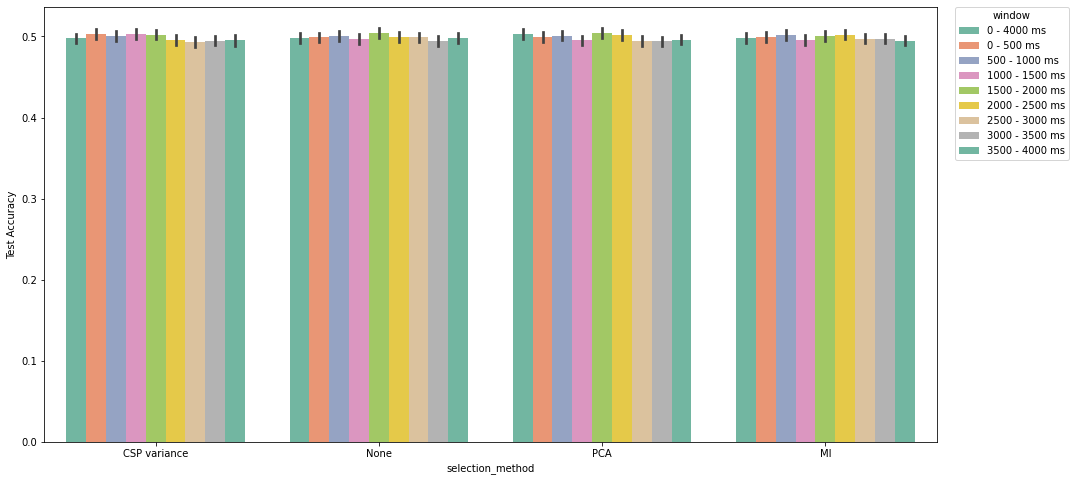

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
window_mapping = {
    'all': '0 - 4000 ms',
    '0': '0 - 500 ms',
    '1': '500 - 1000 ms',
    '2': '1000 - 1500 ms',
    '3': '1500 - 2000 ms',
    '4': '2000 - 2500 ms',
    '5': '2500 - 3000 ms',
    '6': '3000 - 3500 ms',
    '7': '3500 - 4000 ms'
}
plot_df = df.copy()
plot_df['window'].replace(window_mapping, inplace=True)

sns.barplot(data=plot_df[plot_df['n_filters'] == 16], x='selection_method', y='Test Accuracy', hue='window', palette='Set2', ax=ax)
plt.legend(title='window', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.);

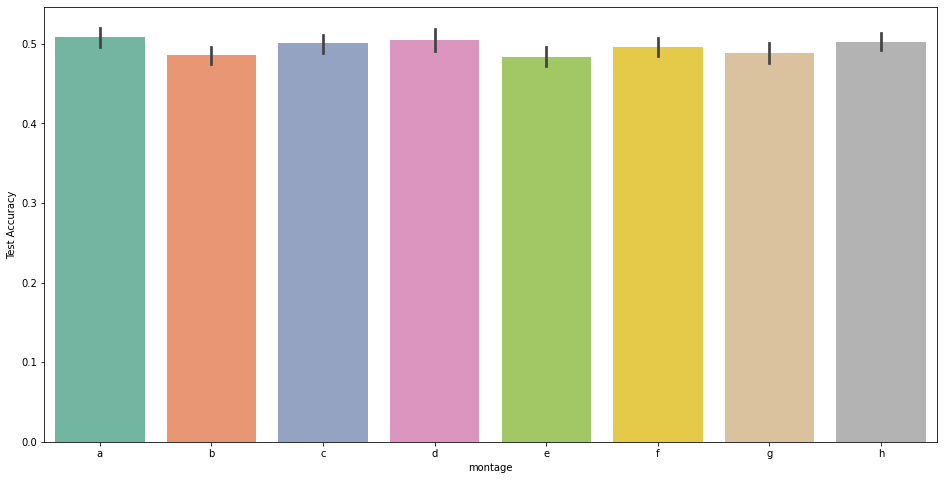

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.barplot(data=df[((df['window'] == '6') | (df['window'] == '7')) & (df['n_filters'] == 16) & (df['selection_method'] == 'None')], x='montage', y='Test Accuracy', palette='Set2', ax=ax);

# RS anchor

In [55]:
root_dir = os.path.join(constants.RESULTS_DIR, 'motor_LR', 'csp_baseline', 'linear_svm', 'rs', 'randomized')


df = pd.DataFrame()

for directory in ['16_filters']:
    exp_dirs = [d for d in os.listdir(os.path.join(root_dir, directory)) if os.path.isdir(os.path.join(root_dir, directory, d))]

    for d in exp_dirs:
        if d.startswith('no_select'):
            try:
                temp = pd.read_parquet(os.path.join(root_dir, directory, d, 'None_results.parquet'))
                if 'log_var' in d:
                    temp.loc[:, 'selection_method'] = 'CSP variance'
                    window = d.split('_')[-3]
                else:
                    temp.loc[:, 'selection_method'] = 'None'
                    window = d.split('_')[-1]
                temp.loc[:, 'window'] = window
            except:
                continue

        else:
            selection_method = d.split('_')[-1]
            window = d.split('_')[2]
            if selection_method in ['mi', 'pca', 'rfe', 'sfs']:
                selection_method = selection_method.upper()
            try:
                temp = pd.read_parquet(os.path.join(root_dir, directory, d, f'{selection_method}_results.parquet'))
                temp.loc[:, 'selection_method'] = selection_method
                temp.loc[:, 'window'] = window
            except:
                continue

        if 'log_var' in d:
            temp.loc[:, 'log_var_feats'] = True
        else:
            temp.loc[:, 'log_var_feats'] = False


        if 'linear_svm' in d:
            temp.loc[:, 'classifier_type'] = 'linear SVM'
        elif 'rf' in d:
            temp.loc[:, 'classifier_type'] = 'random forest'

        df = df.append(temp, ignore_index=True)
    
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
train_cols = [f'Train {m}' for m in metrics]
valid_cols = [f'Valid {m}' for m in metrics]
test_cols = [f'Test {m}' for m in metrics]

# Sort by column values
window_sorter = ['all', '0', '1', '2', '3', '4', '5', '6', '7']
select_sorter = ['CSP variance', 'None', 'PCA', 'MI']
df.window = df.window.astype('category')
df.window.cat.set_categories(window_sorter, inplace=True)
df.selection_method = df.selection_method.astype('category')
df.selection_method.cat.set_categories(select_sorter, inplace=True)
df.sort_values(['window', 'selection_method'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [57]:
pd.options.display.max_rows = 999
df[(df['selection_method'] == 'None') & (df['n_filters'] == 16)].groupby(['window', 'montage']).mean()[test_cols]

Test Accuracy  Test Precision  Test Recall   Test F1
window montage                                                      
all    a             0.514033        0.513794     0.512831  0.505206
       b             0.492246        0.492673     0.491500  0.485539
       c             0.499179        0.498780     0.499044  0.494894
       d             0.510601        0.511227     0.510452  0.506402
       e             0.488903        0.487347     0.488400  0.481416
       f             0.506288        0.506223     0.506012  0.501059
       g             0.487574        0.487318     0.487716  0.483204
       h             0.501942        0.501085     0.501280  0.496532
0      a             0.499126        0.498081     0.498789  0.488966
       b             0.497343        0.496582     0.496536  0.490990
       c             0.487445        0.484702     0.486611  0.478622
       d             0.482948        0.481175     0.482683  0.473960
       e             0.477884        0.476260     0.477622  0.470567
       f             0.504831        0.506200     0.504694  0.497880
       g             0.486735        0.484970     0.486331  0.478016
       h             0.497484        0.498740     0.496465  0.489351
1      a             0.518199        0.518902     0.517392  0.511382
       b             0.499763        0.498800     0.499705  0.493246
       c             0.473671        0.471860     0.473541  0.468118
       d             0.519938        0.521379     0.519461  0.512155
       e             0.521027        0.521040     0.520815  0.509884
       f             0.508817        0.508916     0.508308  0.503189
       g             0.500286        0.501160     0.499156  0.490449
       h             0.504512        0.505385     0.504065  0.498840
2      a             0.506523        0.506895     0.505630  0.499061
       b             0.502074        0.500594     0.501172  0.494254
       c             0.497795        0.497139     0.497163  0.491431
       d             0.485935        0.484496     0.485452  0.480168
       e             0.504821        0.503995     0.504089  0.498057
       f             0.491232        0.489718     0.491304  0.484104
       g             0.495200        0.493769     0.494384  0.485967
       h             0.482800        0.479588     0.481811  0.474993
3      a             0.484414        0.482109     0.483859  0.476030
       b             0.493259        0.493113     0.492546  0.485983
       c             0.492642        0.491722     0.492145  0.485418
       d             0.483348        0.482732     0.483292  0.477202
       e             0.505099        0.504656     0.504486  0.498391
       f             0.511827        0.512198     0.511452  0.504917
       g             0.482137        0.480806     0.481604  0.475411
       h             0.514927        0.514987     0.514172  0.509324
4      a             0.479855        0.479315     0.479517  0.474457
       b             0.497677        0.496610     0.497347  0.492560
       c             0.499934        0.499950     0.499284  0.493497
       d             0.524610        0.524686     0.524269  0.517311
       e             0.504878        0.505130     0.504245  0.497523
       f             0.500940        0.499785     0.500503  0.492697
       g             0.508582        0.509762     0.507575  0.501389
       h             0.492502        0.490677     0.490332  0.482684
5      a             0.489778        0.489181     0.489658  0.481963
       b             0.509130        0.507302     0.508290  0.499773
       c             0.509330        0.509087     0.508759  0.502715
       d             0.515882        0.517001     0.515504  0.508353
       e             0.508235        0.508497     0.507599  0.502152
       f             0.471530        0.468755     0.471849  0.462246
       g             0.506394        0.506179     0.505417  0.496268
       h             0.502656        0.502633     0.502285  0.496198
6      a      

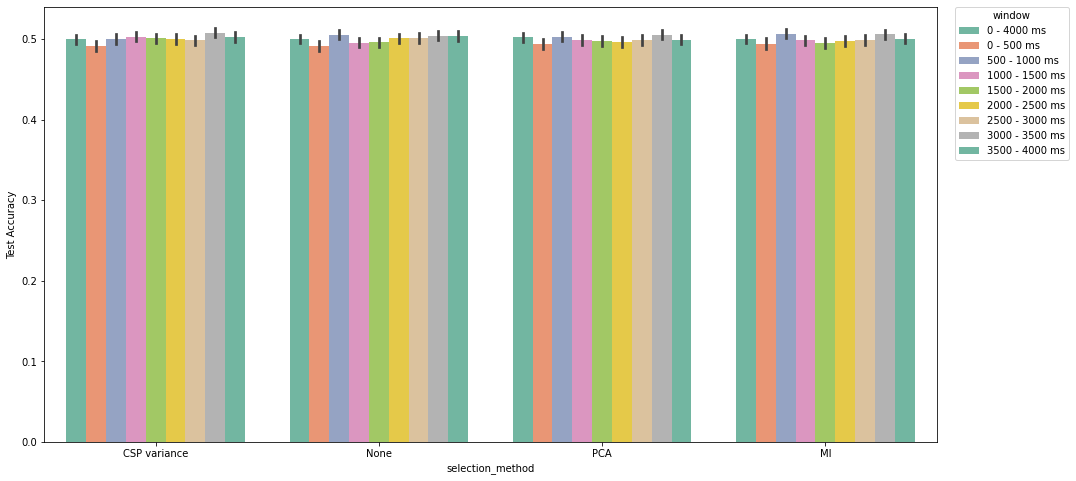

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
window_mapping = {
    'all': '0 - 4000 ms',
    '0': '0 - 500 ms',
    '1': '500 - 1000 ms',
    '2': '1000 - 1500 ms',
    '3': '1500 - 2000 ms',
    '4': '2000 - 2500 ms',
    '5': '2500 - 3000 ms',
    '6': '3000 - 3500 ms',
    '7': '3500 - 4000 ms'
}
plot_df = df.copy()
plot_df['window'].replace(window_mapping, inplace=True)

sns.barplot(data=plot_df[plot_df['n_filters'] == 16], x='selection_method', y='Test Accuracy', hue='window', palette='Set2', ax=ax)
plt.legend(title='window', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.);

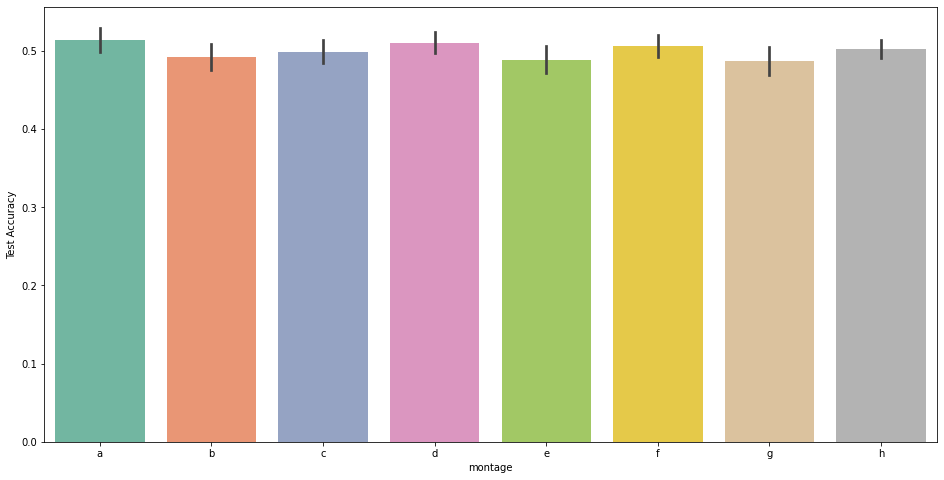

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.barplot(data=df[(df['window'] == 'all') & (df['n_filters'] == 16) & (df['selection_method'] == 'None')], x='montage', y='Test Accuracy', palette='Set2', ax=ax);